# Содержание

In [ ]:
!pip3 install pandas_profiling
# !pip3 install pandas_profiling
# !pip3 install --upgrade --user scikit-learn


     |████████████████████████████████| 268 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 709 kB 22.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 74.9 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 101.3 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 103.3 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 86.4 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=0717943e2b51077351c103f73da7cfc4b53737ae2c599980ab799f7fb8821ddb
  Stored in directory: /home/jovyan/.cache/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import figure



In [ ]:
# скрываем предупреждения
warnings.filterwarnings('ignore')

In [ ]:
np.random.seed(seed=7)

In [ ]:
try:
    geo_0 = pd.read_csv(r'/datasets/geo_data_0.csv')
    geo_1 = pd.read_csv(r'/datasets/geo_data_1.csv')
    geo_2 = pd.read_csv(r'/datasets/geo_data_2.csv')

except:
    geo_0 = pd.read_csv(r'C:\Users\new\Downloads\geo_data_0.csv')
    geo_1 = pd.read_csv(r'C:\Users\new\Downloads\geo_data_1.csv')
    geo_2 = pd.read_csv(r'C:\Users\new\Downloads\geo_data_2.csv')


In [ ]:
# Функция для ознакомления с данными
def pre_view(data,n_row=4,head=True, info=True,columns=True,shape=True,isna=True,duplicated=True):
    if head:
        print(f'First {n_row} row(s) in the head of data')
        display(data.head(n_row))
        print('-'*30)
    if info:
        print('Data Information:')
        display(data.info())
        print('-'*30)
    if columns:
        print('Data columns:')
        display(data.columns)
        print('-'*30)
    if shape:
        print('Data shape:')
        display(data.shape)
        print('-'*30)
    if isna:
        print('Data isna by row mean:')
        display(data.isna().mean())
        print('-'*30)
    if duplicated:
        print('Data clear duplicates sum:')
        display(data.isna().mean())
        print('-'*30)



In [ ]:
# ProfileReport(geo_0)

In [ ]:
pre_view(geo_0)

First 4 row(s) in the head of data


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776


------------------------------
Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

------------------------------
Data columns:


Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

------------------------------
Data shape:


(100000, 5)

------------------------------
Data isna by row mean:


id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64

------------------------------
Data clear duplicates sum:


id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64

------------------------------


In [ ]:
geo_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


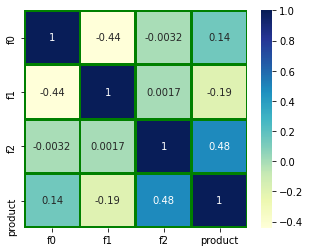

In [ ]:
figure(figsize=(5,4))

sns.heatmap(geo_0.drop(columns=['id'],axis=1).corr(),
            annot=True,
            cmap='YlGnBu',
            linewidth=2,
            linecolor='green')
plt.show()

**Вывод:**

В первом регионе (таблица `geo_0`), мы можем видеть, что на количество нефти в скважине влиют все три признаки `f0`, `f1` и `f2`.

Значение коэффициента корреляции Пирсона:
* `f0` - **0.14**, низкая, не ниже 0.1, значит маленькую, но лепту этот признак вносит в количество запасов  основного продукта. Коэффициент положительный, значит, что при увеличении оного увеличивается и объем.
* `f1` - **-0.19**, чуть ближе к средней корреляции нежели `f0`, однако в этом случае (отрицательный коэффициент корреляции) этот признак влияет пагубно на количество нефти. С увеличением данного признака, общее количество нефти падает.
* `f2` - **0.48**, уже заметная зависимость. Чем больше данный признак, тем больше нефти.

Также стоить отметить, что сильной мультиколлинеарности между признакми нет. Поэтому можем оставить все как есть.

In [ ]:
# ProfileReport(geo_1)

In [ ]:
pre_view(geo_1)

First 4 row(s) in the head of data


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408


------------------------------
Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

------------------------------
Data columns:


Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

------------------------------
Data shape:


(100000, 5)

------------------------------
Data isna by row mean:


id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64

------------------------------
Data clear duplicates sum:


id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64

------------------------------


In [ ]:
geo_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


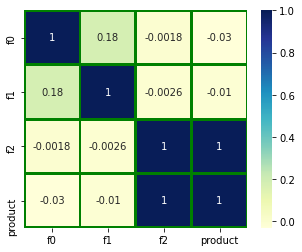

In [ ]:
figure(figsize=(5,4))

sns.heatmap(geo_1.drop(columns=['id'],axis=1).corr(),
            annot=True,
            cmap='YlGnBu',
            linewidth=2,
            linecolor='green')
plt.show()

**Вывод:**

В первом регионе (таблица `geo_0`), мы можем видеть, что на количество нефти в скважине влиют все три признаки `f0`, `f1` и `f2`.

Значение коэффициента корреляции Пирсона:
* `f0` - **-0.03**, очень низкая зависимость. Но она отрицательная.
* `f1` - **-0.01**, практически нулевая отрицательная зависимость.
* `f2` - **1**, абсолютная (функциональная) зависимость. Очень хорошо.

Также стоить отметить, что сильной мультиколлинеарности между признакми нет. Поэтому можем оставить все как есть.

In [ ]:
# ProfileReport(geo_2)

In [ ]:
pre_view(geo_2)

First 4 row(s) in the head of data


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842


------------------------------
Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

------------------------------
Data columns:


Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

------------------------------
Data shape:


(100000, 5)

------------------------------
Data isna by row mean:


id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64

------------------------------
Data clear duplicates sum:


id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64

------------------------------


In [ ]:
geo_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


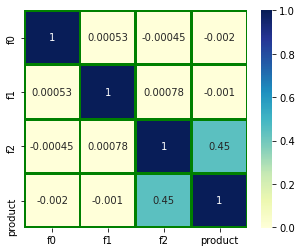

In [ ]:
figure(figsize=(5,4))

sns.heatmap(geo_2.drop(columns=['id'],axis=1).corr(),
            annot=True,
            cmap='YlGnBu',
            linewidth=2,
            linecolor='green')
plt.show()

**Вывод:**

В первом регионе (таблица `geo_0`), мы можем видеть, что на количество нефти в скважине влиют все три признаки `f0`, `f1` и `f2`.

Значение коэффициента корреляции Пирсона:
* `f0` - **-0.002**, практически незаметная отрицательня корреляция.
* `f1` - **-0.001**, также мизерное, эфимерное вляние.
* `f2` - **0.45**, средняя корреляция, практически сильно заметная.

Также стоить отметить, что сильной мультиколлинеарности между признакми нет. Поэтому можем оставить все как есть.

## Первый взгляд. Общий вывод

**Общий вывод:**

Есть общая зависимость между запасами нефти и тремя признаками `f0`, `f1` и `f2`:

`f2` однозначно во всех регионах показывает сильную положительную корреляцию.

А `f0` и `f1` во втором и третьем регионе практически не отличаются, в знаке как минимум. А в первом регионе значения коэффициента корреляции обретают бОльшое значение, также один из них, а именно - `f0`, имеет унарный плюс, вместо унарного минуса как в случае с `f1`

## Обучение и проверка моделей для всех регионов.

In [ ]:
geo_0 = geo_0.drop(columns='id',axis=1)
geo_1 = geo_1.drop(columns='id',axis=1)
geo_2 = geo_2.drop(columns='id',axis=1)

In [ ]:
geo_0.name = 'geo_0'
geo_1.name = 'geo_1'
geo_2.name = 'geo_2'

In [ ]:
def teach_valid(data,ts=0.25,r2_=True,mse_=True,rmse_=True,mae_=True,mape_=True,rs=7):
    features = data.drop(columns=['product'],axis=1)
    target = data['product']
    features_train,features_valid,target_train,target_valid = train_test_split(features,
                                                                               target,
                                                                               test_size=ts,
                                                                              random_state=rs)
    regressor = LinearRegression()
    regressor.fit(features_train,target_train)
    pred_lst_ = regressor.predict(features_valid)
    coef_ = regressor.coef_
    intercept_ = regressor.intercept_

    print(f'Коэффициенты линейной регресси для {data.name} слудующие: {coef_}\n')
    print(f'Интерсепт {intercept_}\n')
    print(f'Для таблицы {data.name} имеем следующие значения метрик линейной регрессии: \n')
    if rmse_:
        rmse = mean_squared_error(target_valid,pred_lst_,squared=False)
        print(f'RMSE для региона с таблицей под названием {data.name} равно: {rmse} \n')
    if mse_:
        mse= mean_squared_error(target_valid,pred_lst_,squared=True)
        print(f'MSE для региона с таблицей под названием {data.name} равно: {mse} \n')
    if r2_:
        r2 = r2_score(target_valid,pred_lst_)
        print(f'R2 для региона с таблицей под названием {data.name} равно: {r2} \n')
    if r2_:
# r2_sc - R2 значение
# k - количество признаков
# n - размер таблицы
        k = features.shape[1]
        r2_sc = r2_score(target_valid,pred_lst_)
        n = len(target)
        r2_adj = 1 - (1 - r2_sc) * ((k - 1) / (k - n - 1) )
        print(f'R2 adjusted для региона с таблицей под названием {data.name} равно: {r2_adj} \n')
    if mae_:
        mae = mean_absolute_error(target_valid,pred_lst_)
        print(f'MAE для региона с таблицей под названием {data.name} равно: {mae} \n')
    if mape_:
        mape = mean_absolute_percentage_error(target_valid,pred_lst_)
        print(f'MAPE для региона с таблицей под названием {data.name} равно: {mape} \n')
    mean_oil_predict_ = np.mean(pred_lst_)
    print(f'Средний запас предсказанного сырья равен {mean_oil_predict_} тыс. барр.')
    print('-'*30)
    print('Распределение запасов сырья:\n')
    print('Среднее значения запасов  - лииня зеленого цвета')
    sns.distplot(pd.Series(pred_lst_),bins=100,hist=True,kde=True)
    plt.grid()
    plt.title('Гистограмма запасов нефти c ядерной оценкой плоскости')
    plt.xlabel('Тыс. барр.')
    plt.ylabel('Кол-во')
    plt.axvline(x=pd.Series(pred_lst_).mean(),color='green',linewidth=3,alpha=0.8)
    plt.show()
    return pred_lst_, target,target_valid,mean_oil_predict_, coef_, intercept_, rmse

### geo_0

Коэффициенты линейной регресси для geo_0 слудующие: [  3.82207041 -14.17147255   6.57045059]

Интерсепт 77.65677827341965

Для таблицы geo_0 имеем следующие значения метрик линейной регрессии: 

RMSE для региона с таблицей под названием geo_0 равно: 37.61698862149409 

MSE для региона с таблицей под названием geo_0 равно: 1415.0378329496157 

R2 для региона с таблицей под названием geo_0 равно: 0.27859317083753576 

R2 adjusted для региона с таблицей под названием geo_0 равно: 1.0000144284251518 

MAE для региона с таблицей под названием geo_0 равно: 31.00823373486214 

MAPE для региона с таблицей под названием geo_0 равно: 1.9632499128525909 

Средний запас предсказанного сырья равен 92.50122097236377 тыс. барр.
------------------------------
Распределение запасов сырья:

Среднее значения запасов  - лииня зеленого цвета


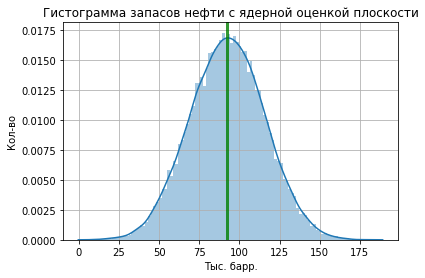

In [ ]:
predict_geo_0, target_geo_0, target_valid_geo_0,mean_oil_predict_geo_0, coef_geo_0,intercept_geo_0,rmse_geo_0 = teach_valid(geo_0)

In [ ]:
mean_oil_predict_geo_0

92.50122097236377

In [ ]:
predict_geo_0

array([ 87.34847961,  84.31680699,  97.26245723, ..., 116.11358885,
        62.91275356,  95.28259928])

In [ ]:
coef_geo_0

array([  3.82207041, -14.17147255,   6.57045059])

In [ ]:
intercept_geo_0

77.65677827341965

**Вывод:**

В **первом** регионе средний предсказанный объем нефти равен: **92.5012 тыс. барр.**

По качеству модели метрики очень хорошие одни из самых простых для интерпитации:

1. **MAPE - 1.9632499128525909** весьма приличный показатель, отличается очень на маленькое количество процентов от фактического.
2. **R2 - 0.2785931708375359** 28 процентов объясняется отношением
3. **RMSE - 37.61698862149409**




### geo_1

Коэффициенты линейной регресси для geo_1 слудующие: [-1.44695106e-01 -2.11585969e-02  2.69499539e+01]

Интерсепт 1.6631296560641857

Для таблицы geo_1 имеем следующие значения метрик линейной регрессии: 

RMSE для региона с таблицей под названием geo_1 равно: 0.8901574284390849 

MSE для региона с таблицей под названием geo_1 равно: 0.7923802474052845 

R2 для региона с таблицей под названием geo_1 равно: 0.9996244237480246 

R2 adjusted для региона с таблицей под названием geo_1 равно: 1.0000000075116753 

MAE для региона с таблицей под названием geo_1 равно: 0.719016191372541 

MAPE для региона с таблицей под названием geo_1 равно: 270869072230838.06 

Средний запас предсказанного сырья равен 68.81713795297324 тыс. барр.
------------------------------
Распределение запасов сырья:

Среднее значения запасов  - лииня зеленого цвета


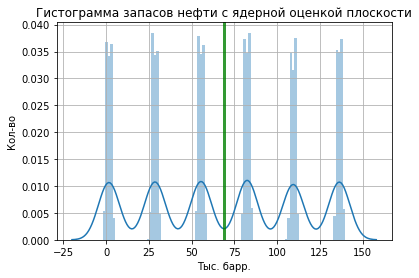

In [ ]:
predict_geo_1,target_geo_1,target_valid_geo_1, mean_oil_predict_geo_1,coef_geo_1,intercept_geo_1,rmse_geo_1 =teach_valid(geo_1)

In [ ]:

# features = geo_1.drop(columns=['product'],axis=1)
# target = geo_1['product']
# features_train,features_valid,target_train,target_valid = train_test_split(features,
#                                                                                target,
#                                                                                test_size=0.25,
#                                                                               random_state=7)
# regressor = LinearRegression()
# regressor.fit(features_train,target_train)
# pred_lst = regressor.predict(features_valid)
# tru = np.array(target_valid)
# new = list()
# for i in range(len(tru)):
#     try:
# #         фильтр, чтобы избавиться от 0 в фактческих значениях
#         if tru[i] != 0:
#             new.append((abs(tru[i] - pred_lst[i])/abs(tru[i]))*100)
#     except:
#         continue
# print(pd.Series(new).mean())

In [ ]:
mean_oil_predict_geo_1

68.81713795297324

In [ ]:
predict_geo_1

array([108.88781388,   0.68815657, 137.73391939, ..., 136.7829639 ,
       110.2652354 ,  81.8663542 ])

In [ ]:
coef_geo_1

array([-1.44695106e-01, -2.11585969e-02,  2.69499539e+01])

In [ ]:
intercept_geo_1

1.6631296560641857

**Вывод:**

Во **втором** регионе средний предсказанный объем нефти равен: **68.8171 тыс. барр.**

По качеству модели метрики очень хорошие одни из самых простых для интерпитации:

1. **MAPE - 270869072230885.8** - не понимаю, как интерпретировать такие значения в MAPE
2. **R2 - 0.9996244237480246** - 99% вариации выборки объясняется отношением
3. **RMSE - 0.8901574284390872** - хороший показатель




### geo_2

Коэффициенты линейной регресси для geo_2 слудующие: [-0.06863612 -0.09000843  5.72816797]

Интерсепт 80.69102574455522

Для таблицы geo_2 имеем следующие значения метрик линейной регрессии: 

RMSE для региона с таблицей под названием geo_2 равно: 39.926127352654355 

MSE для региона с таблицей под названием geo_2 равно: 1594.095645380374 

R2 для региона с таблицей под названием geo_2 равно: 0.20142142084269643 

R2 adjusted для региона с таблицей под названием geo_2 равно: 1.0000159718910209 

MAE для региона с таблицей под названием geo_2 равно: 32.69490532019326 

MAPE для региона с таблицей под названием geo_2 равно: 10314842098264.213 

Средний запас предсказанного сырья равен 94.82396409311701 тыс. барр.
------------------------------
Распределение запасов сырья:

Среднее значения запасов  - лииня зеленого цвета


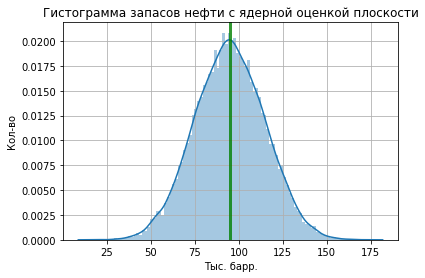

In [ ]:
predict_geo_2,target_geo_2, target_valid_geo_2,mean_oil_predict_geo_2,coef_geo_2,intercept_geo_2,rmse_geo_2 = teach_valid(geo_2)

In [ ]:
mean_oil_predict_geo_2

94.82396409311701

In [ ]:
predict_geo_2

array([ 94.1143419 ,  99.11823958, 108.6526572 , ...,  89.19502457,
        49.90676966,  86.99351659])

In [ ]:
coef_geo_2

array([-0.06863612, -0.09000843,  5.72816797])

In [ ]:
intercept_geo_2

80.69102574455522

**Вывод:**

В **третьем** регионе средний предсказанный объем нефти равен: **94.8240 тыс. барр.**

По качеству модели метрики очень хорошие одни из самых простых для интерпитации:

1. **MAPE - 10314842098264.219** - тоже не знаю как интерпретировать
2. **R2 - 0.20142142084269654** -20% вариации выборки объясняется отношением
3. **RMSE - 39.92612735265435**  





## Общий вывод по моделям:
* В **первом** регионе средний предсказанный объем нефти равен: **92.5012 тыс. барр.**
* **RMSE - 37.61698862149409** немного лучше, чем в остальный регионах.
--------

* Во **втором** регионе средний предсказанный объем нефти равен: **68.8171 тыс. барр.**
* **RMSE - 0.8901574284390872** - очень хороший показаиель
------------

* В **третьем** регионе средний предсказанный объем нефти равен: **94.8240 тыс. барр.**
*  **RMSE - 39.92612735265435** - не самый лучший показатель


In [ ]:
mean_oil_predict_geo_0,mean_oil_predict_geo_1,mean_oil_predict_geo_2

(92.50122097236377, 68.81713795297324, 94.82396409311701)

In [ ]:
rmse_geo_2

39.926127352654355

In [ ]:
geo_mean_reserves = pd.DataFrame(data={'Регион':['geo_0','geo_1','geo_2'],
                                       "Средний запас нефти":[mean_oil_predict_geo_0,mean_oil_predict_geo_1,mean_oil_predict_geo_2],
                                      'Значение метрики RMSE':[rmse_geo_0,rmse_geo_1,rmse_geo_2]})

In [ ]:
geo_mean_reserves

,Регион,Средний запас нефти,Значение метрики RMSE
0,geo_0,92.501221,37.616989
1,geo_1,68.817138,0.890157
2,geo_2,94.823964,39.926127


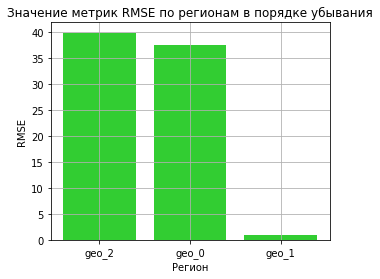

In [ ]:
figure(figsize=(5,4))

plt.bar(geo_mean_reserves.sort_values(by=['Значение метрики RMSE'],ascending=False)['Регион'],
        geo_mean_reserves.sort_values(by=['Значение метрики RMSE'],ascending=False)['Значение метрики RMSE'],
        color='limegreen')
plt.title('Значение метрик RMSE по регионам в порядке убывания')
plt.xlabel('Регион')
plt.ylabel('RMSE')
plt.grid()
plt.show()

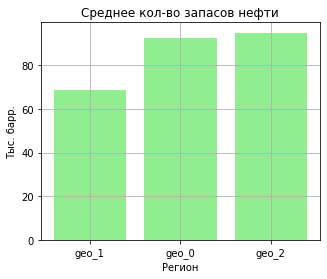

In [ ]:
figure(figsize=(5,4))
plt.bar(geo_mean_reserves.sort_values(by='Средний запас нефти')['Регион'],
        geo_mean_reserves.sort_values(by='Средний запас нефти')['Средний запас нефти'],
        color='lightgreen')
plt.title('Среднее кол-во запасов нефти')
plt.xlabel('Регион')
plt.ylabel('Тыс. барр.')
plt.grid()
plt.show()


In [ ]:
geo_mean_reserves.corr()

,Средний запас нефти,Значение метрики RMSE
Средний запас нефти,1.000000,0.999607
Значение метрики RMSE,0.999607,1.000000


In [ ]:
geo_mean_reserves

,Регион,Средний запас нефти,Значение метрики RMSE
0,geo_0,92.501221,37.616989
1,geo_1,68.817138,0.890157
2,geo_2,94.823964,39.926127


**Вывод:**

Из графиков и матрицы коэффициентов корреляции Пирсона видно, что между RMSE и среднем значнием есть практически абсолютная (функцинальная) зависимость. При увеличении RMSE, средний запас нефти растет.

Лучшие модели по возрастанию RMSE и их средние запасы нефти:

1. Регион 2
    * Средний запас нефти равен **68.817138 тысяч. барр.**
    * RMSE равен **0.890157**
2. Регион 1
    * Средний запас нефти равен **92.501221 тысяч. барр.**
    * RMSE равен **37.616989**
3. Регион 3
    * Средний запас нефти равен **94.823964 тысяч. барр.**
    * RMSE равен **39.926127**


Считаю, что лучше выбрать для разведки и расчета прибыли Регион 3

## Подготовка  и расчет прибыли и рисков

In [ ]:
SEARCH_REGION = 500
BUDGET = 10_000_000_000
BEST_SLIM_HOLE = 200
BARREL_PRICE = 450
UNITS_PROFIT= 450_000
RISK = 0.025

In [ ]:
BREAK_EVEN_POINT = (BUDGET /  UNITS_PROFIT) / BEST_SLIM_HOLE

In [ ]:
BREAK_EVEN_POINT

111.11111111111111

In [ ]:
geo_mean_reserves

,Регион,Средний запас нефти,Значение метрики RMSE
0,geo_0,92.501221,37.616989
1,geo_1,68.817138,0.890157
2,geo_2,94.823964,39.926127


In [ ]:
def profit_calculation(target, predictions, points_for_develop=BEST_SLIM_HOLE):
    # Отбираем скважины с максимальными значениями предсказаний
    pred_points = predictions.sort_values(ascending=False)
    # Выбираем 200 лучших
    target_points = target[pred_points.index][:points_for_develop]
    # Рассчитаем прибыль
    profit = target_points.sum() * UNITS_PROFIT - BUDGET
    return profit


In [ ]:
profit_geo_0 = profit_calculation(target_geo_0,pd.Series(predict_geo_0))



In [ ]:
profit_geo_1 = profit_calculation(target_geo_1,pd.Series(predict_geo_1))



In [ ]:
profit_geo_2 = profit_calculation(target_geo_2,pd.Series(predict_geo_2))



In [ ]:
profit_geo_0

-1648835495.4938002

In [ ]:
profit_geo_1

-3858823873.629981

In [ ]:
profit_geo_2

-1661945527.8414288

In [ ]:
rs = 7

In [ ]:

def profit_and_risk(y_valid, y_pred, region, oil_exploration_points=SEARCH_REGION, show_print=True):
    # Cоздадим объект RandomState() чтобы при каждом новом вызове его состояние менялось на случайное
    state = np.random.RandomState(rs)
    # Список значений прибыли каждой из подвыборок
    bootstrap_profit = []
    y_valid = y_valid.reset_index(drop=True)
    y_pred = pd.Series(y_pred)
    # Делаем bootstrap на 1000 выборок
    for i in range(1000):
        # Берем случайную выборку на 500 точек
        target_subsample = y_valid.sample(
            oil_exploration_points, replace=True, random_state=state)
        # И предсказания по этим точкам
        probs_subsample = y_pred[target_subsample.index]
        # Передаем в функцию расчета прибыли
        res = profit_calculation(target_subsample, probs_subsample)
        # Добавляем в список
        bootstrap_profit.append(res)

    bootstrap_profit = pd.Series(bootstrap_profit)
    # Нижний квантиль
    lower = bootstrap_profit.quantile(.025)
    # Верхний
    high = bootstrap_profit.quantile(.975)
    # Среднее значение
    mean_profit = round(bootstrap_profit.mean()/1e6)
    # Риск определим как вероятность получения отрицательной прибыли (в скольки случаях из 1000 мы получаем отрицательную прибыль)
    risk = (bootstrap_profit < 0).mean() * 100
    if show_print:
        print(f'Средняя прибыль в регионе {region}: {mean_profit} млн.руб')
        print(
            f'95%-доверительный интервал для региона {region} ({round(lower / 1e6, 1)} - {round(high / 1e6, 1)}) млн.руб')
        print(
            f'Риск убытков для региона {region}: {risk} %')

    return mean_profit, risk

In [ ]:
profit_and_risk(target_valid_geo_0,predict_geo_0,geo_0.name)

Средняя прибыль в регионе geo_0: 458 млн.руб
95%-доверительный интервал для региона geo_0 (-73.1 - 995.1) млн.руб
Риск убытков для региона geo_0: 4.6 %


(458, 4.6)

In [ ]:
profit_and_risk(target_valid_geo_1,predict_geo_1,geo_1.name)

Средняя прибыль в регионе geo_1: 497 млн.руб
95%-доверительный интервал для региона geo_1 (81.7 - 947.4) млн.руб
Риск убытков для региона geo_1: 0.8 %


(497, 0.8)

In [ ]:
profit_and_risk(target_valid_geo_2,predict_geo_2,geo_2.name)

Средняя прибыль в регионе geo_2: 388 млн.руб
95%-доверительный интервал для региона geo_2 (-124.0 - 924.7) млн.руб
Риск убытков для региона geo_2: 7.8 %


(388, 7.8)

## Итог

**Вывод:**

Лучший регион для разведки является второй со средней прибылью в 497 млн рублей.

